___
<h1 style="color:blue;">Isolation Forest</h1>

___


## Introduction to Isolation Forest

Isolation Forest is an unsupervised machine learning algorithm that is used for anomaly detection. It is based on the concept of isolating anomalies in the data by constructing a forest of random decision trees. The algorithm is efficient and effective for detecting outliers in high-dimensional datasets.

## Key Concepts

### Anomaly Detection

Anomaly detection is the process of identifying rare items, events, or observations that deviate significantly from the norm in a dataset. These rare items are often referred to as anomalies, outliers, or novelties. Anomaly detection is a critical task in various domains, including fraud detection, network security, and predictive maintenance.

### Isolation Forest Algorithm

The Isolation Forest algorithm is based on the following key concepts:

1. **Isolation**: The algorithm isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of the selected feature.
2. **Recursive Partitioning**: The algorithm recursively partitions the data by repeating the isolation process until the anomalies are isolated in the leaves of the trees.
3. **Anomaly Score**: An anomaly score is calculated for each instance based on the path length in the tree. Anomalies are expected to have shorter path lengths compared to normal instances.
4. **Ensemble of Trees**: The algorithm constructs an ensemble of isolation trees to improve the detection of anomalies. The final anomaly score is calculated as the average path length across all trees.
5. **Thresholding**: Anomalies are identified based on a predefined threshold value. Instances with anomaly scores higher than the threshold are considered anomalies.
6. **Scalability**: The algorithm is efficient and scalable for high-dimensional datasets due to its random selection of features and split values.
7. **Interpretability**: The algorithm provides interpretable results by identifying the features that contribute to the anomaly detection.
8. **Applications**: Isolation Forest is commonly used for detecting anomalies in various domains, including cybersecurity, fraud detection, and industrial monitoring.

### Advantages and Limitations

#### Advantages
- Efficient for high-dimensional datasets
- Scalable to large datasets
- Effective for detecting outliers and anomalies
- Interpretable results
- Robust to noise and irrelevant features

#### Limitations
- Sensitivity to the number of trees and subsample size
- Sensitivity to the threshold value for anomaly detection
- Limited interpretability for complex datasets
- May require tuning of hyperparameters for optimal performance
- Limited ability to handle class imbalance

## Credit Card Fraud Detection Dataset

### Overview
The Credit Card Fraud Detection dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, with the positive class (frauds) accounting for 0.172% of all transactions.

### Features
1. **Time**: Number of seconds elapsed between this transaction and the first transaction in the dataset.
2. **V1-V28**: Principal components obtained with PCA, anonymized due to confidentiality reasons.
3. **Amount**: Transaction amount.
4. **Class**: 1 for fraudulent transactions, 0 otherwise.

### Use Case
This dataset is commonly used for anomaly detection and fraud detection tasks. Techniques like Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM are applied to identify fraudulent transactions based on the transaction features provided.

### Source
The dataset is available on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).



___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
# import the necessary libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Load the Iris dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

>  Making Histograms of the data to understand the distribution of the data.

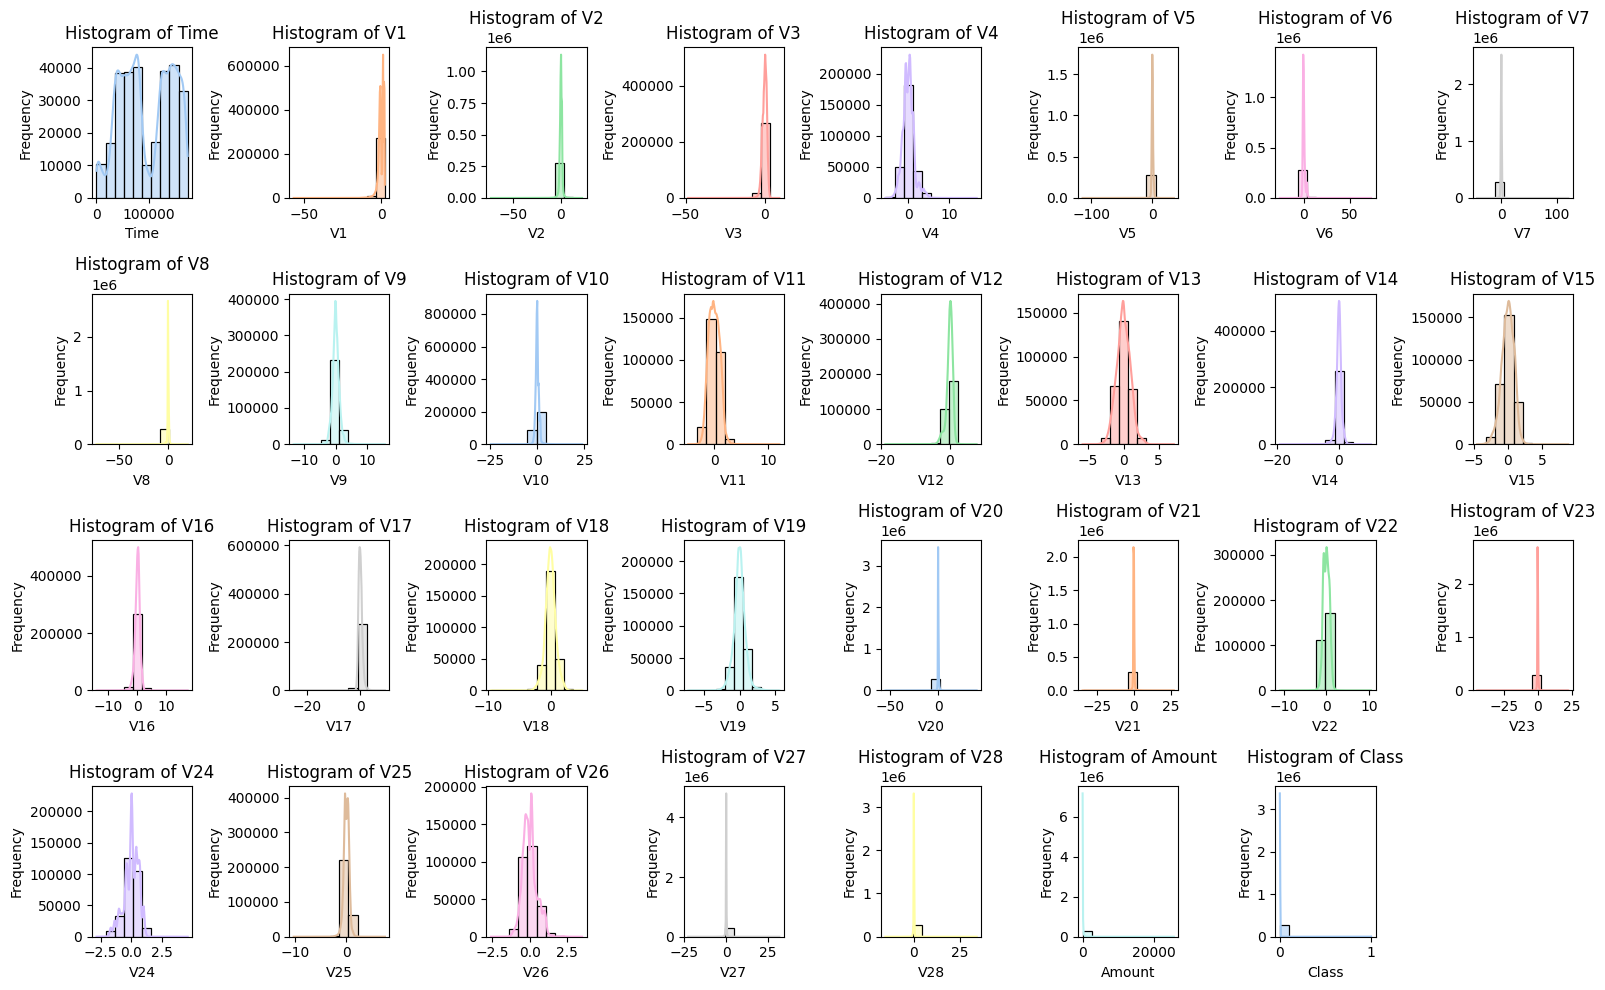

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(4,8, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

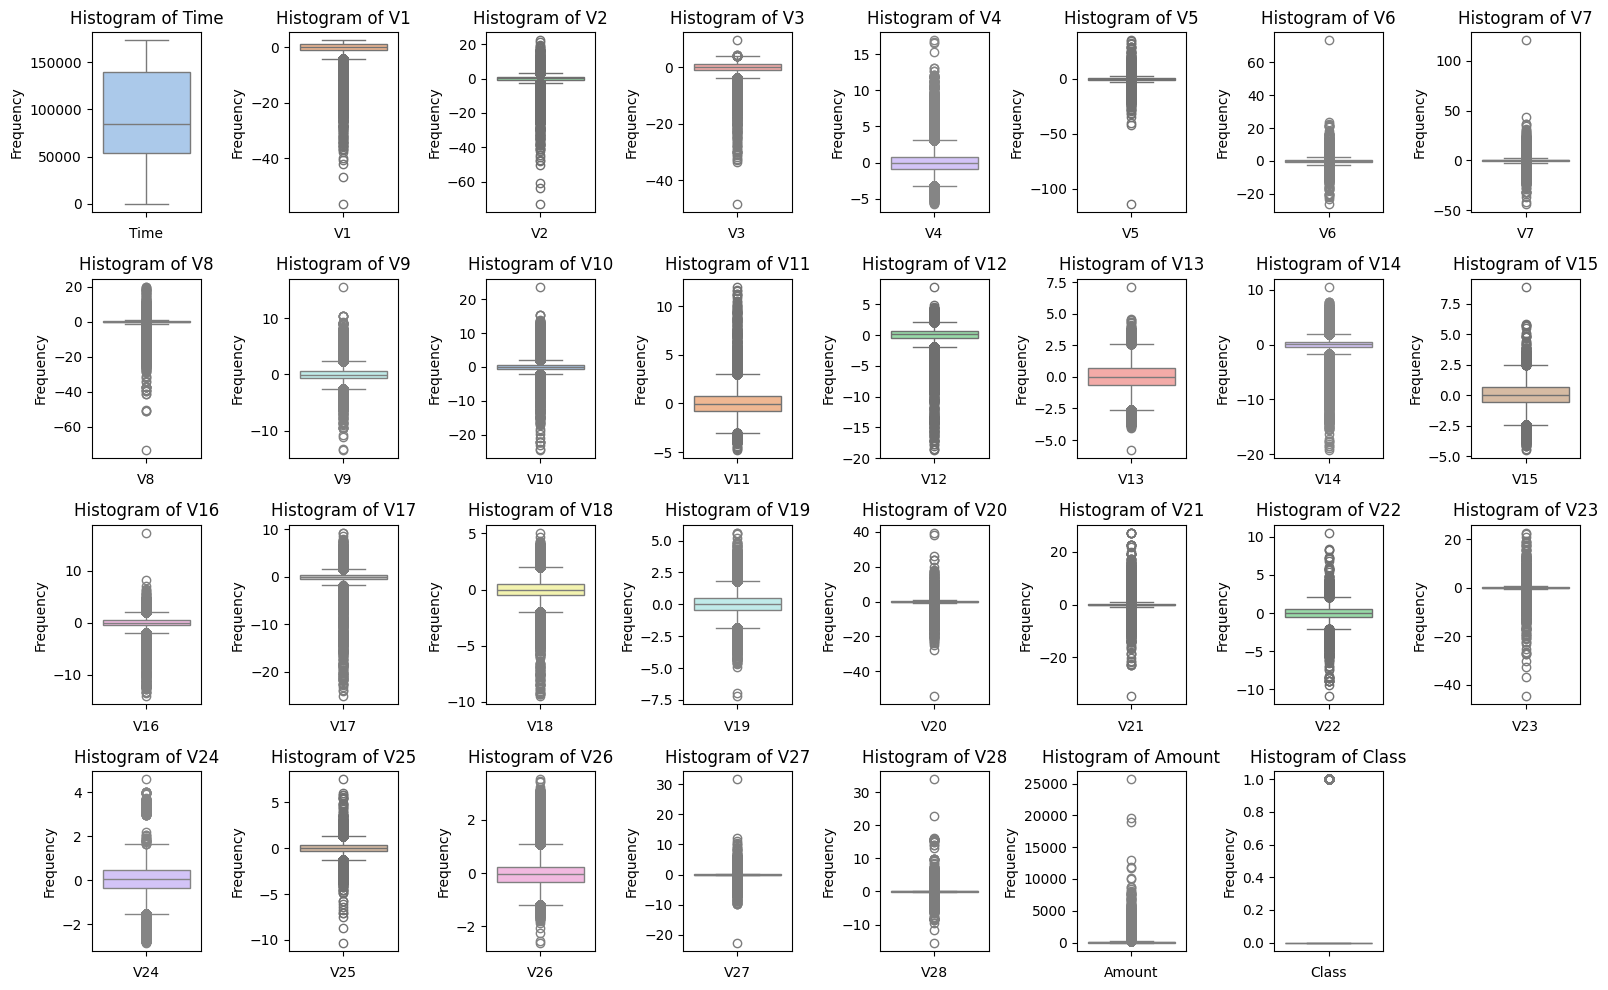

In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(4, 8, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Principal Component Analysis (PCA) Model:

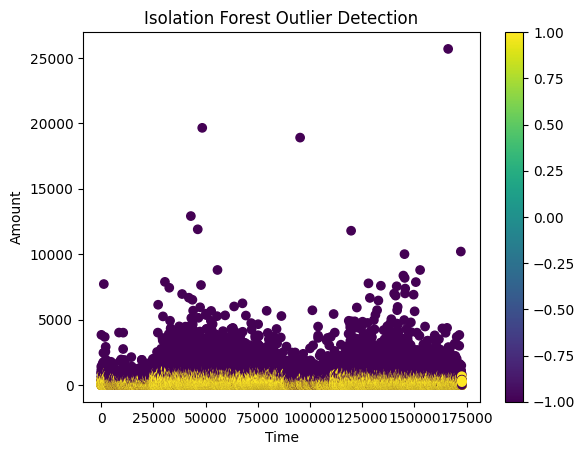

In [5]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Create an Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
model.fit(X)

# Predict outliers (1 for inliers, -1 for outliers)
y_pred = model.predict(X)


# This is a simple example and may need modification for your actual dataset
plt.scatter(X['Time'], X['Amount'], c=y_pred, cmap='viridis')
plt.colorbar()
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>

___

In [6]:
# Evaluate the model
y_true = y.apply(lambda x: -1 if x == 1 else 1)  # Convert y to -1 (outlier) and 1 (inlier)
print("Classification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.02      0.88      0.03       492
           1       1.00      0.90      0.95    284315

    accuracy                           0.90    284807
   macro avg       0.51      0.89      0.49    284807
weighted avg       1.00      0.90      0.95    284807



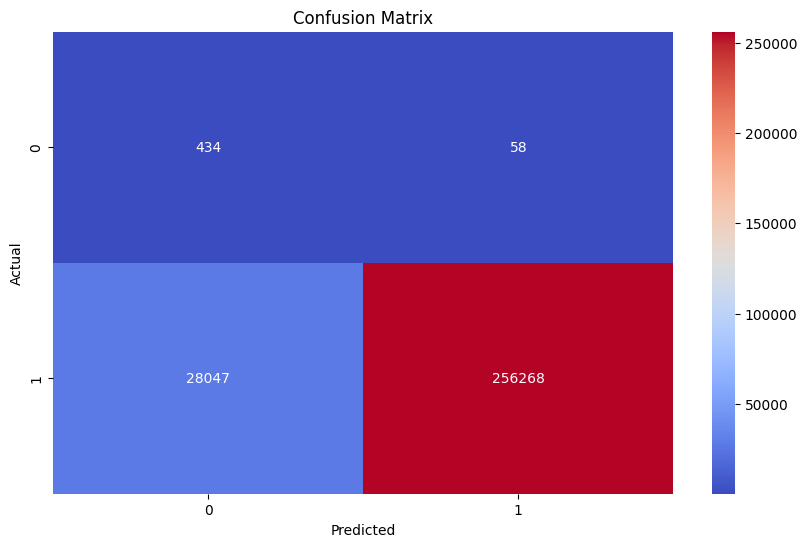

In [7]:
# Confusion matrix
cm =confusion_matrix(y_true, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


___
## <span style="color:blue;">CONCLUSION</span>
___

### Summary of Isolation Forest Evaluation

The Isolation Forest model was applied to detect anomalies in the credit card transaction dataset. Here are the key findings from the evaluation:

- The Isolation Forest model achieved an accuracy of 90%, indicating its effectiveness in identifying inliers (normal transactions) compared to outliers (fraudulent transactions).
- High precision and recall were observed for inliers, suggesting the model's ability to correctly identify normal transactions.
- However, the model showed lower precision for outliers, indicating a higher false positive rate in detecting fraudulent transactions. Further tuning or balancing may be necessary to improve outlier detection performance.

### Insights and Recommendations

Based on the evaluation metrics:

- The Isolation Forest model provides a robust approach to anomaly detection in datasets where anomalies are isolated and distinct, such as in credit card fraud detection.
- For practical applications, consider adjusting the model parameters or exploring ensemble methods to enhance outlier detection accuracy and minimize false positives.

### Acknowledgments

- **Data Source**: The credit card transaction dataset used in this analysis is sourced from a financial institution's anonymized records.
- **Tools**: Python, Scikit-learn, Pandas, Matplotlib, and Seaborn were utilized for data preprocessing, Isolation Forest model development, and evaluation.

Overall, the Isolation Forest model proves valuable in identifying anomalies in complex datasets, offering insights into potentially fraudulent activities while maintaining robust performance in normal transaction detection.
